In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time

# Set up the WebDriver (you can use Chrome or Firefox)
driver = webdriver.Chrome()  # Or use webdriver.Firefox() if you prefer Firefox
# //*[@id="__next"]/main/div[2]/div[3]/section/section/div/section/section/div[2]/div/section/div[2]/div[2]/div[2]/div/span/button/span/span
# Open the IMDb page
page="https://www.imdb.com/search/title/?title_type=feature&genres=sport"
driver.get(page)

# Wait for the page to load
time.sleep(3)

# Define a function to click the "Load More" button
def click_load_more():
    try:
        # Locate the "Load More" button
        load_more_button = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div[2]/div[3]/section/section/div/section/section/div[2]/div/section/div[2]/div[2]/div[2]/div/span/button/span/span')

        # Scroll to the "Load More" button to make sure it's in view
        ActionChains(driver).move_to_element(load_more_button).perform()

        # Click the button
        load_more_button.click()

        # Wait for new content to load
        time.sleep(3)
        return True
    except Exception as e:
        print("Error clicking 'Load More' button:", e)
        return False

# Click "Load More" until the button is no longer available
while click_load_more():
    print("Clicked 'Load More' button")

# Once the loop ends, we assume there is no more content to load
print("No more content to load.")

# Optionally, you can scrape the data you need here after the content is fully loaded.

# Close the driver when done
# driver.quit()


Clicked 'Load More' button
Clicked 'Load More' button
Clicked 'Load More' button
Clicked 'Load More' button
Clicked 'Load More' button
Clicked 'Load More' button
Error clicking 'Load More' button: Message: element click intercepted: Element <span class="ipc-see-more__text">...</span> is not clickable at point (381, 5). Other element would receive the click: <li class="ipc-tab ipc-tab--on-base" role="tab" tabindex="0" aria-selected="false">...</li>
  (Session info: chrome=138.0.7204.184); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#elementclickinterceptedexception
Stacktrace:
	GetHandleVerifier [0x0x7ff7b115e415+77285]
	GetHandleVerifier [0x0x7ff7b115e470+77376]
	(No symbol) [0x0x7ff7b0f29a6a]
	(No symbol) [0x0x7ff7b0f883e9]
	(No symbol) [0x0x7ff7b0f85d8b]
	(No symbol) [0x0x7ff7b0f82dd1]
	(No symbol) [0x0x7ff7b0f81ce1]
	(No symbol) [0x0x7ff7b0f73804]
	(No symbol) [0x0x7ff7b0fa860a]
	(No symbol) [0x0x7ff7b0f72d06]

In [ ]:
//*[@id="__next"]/main/div[2]/div[3]/section/section/div/section/section/div[2]/div/section/div[2]/div[2]/ul/li

In [ ]:
import pandas as pd
# Initialize lists to store the scraped data
titles = []
ratings = []
votings = []
durations = []
# Loop through all movie items on the page
movie_items = driver.find_elements(By.XPATH, '//*[@id="__next"]/main/div[2]/div[3]/section/section/div/section/section/div[2]/div/section/div[2]/div[2]/ul/li')#'//*[@id="__next"]/main/div[2]/div[3]/section/section/div/section/section/div[2]/div/section/div[2]/div[2]/ul/li')

for movie_item in movie_items:#//*[@id="__next"]/main/div[2]/div[3]/section/section/div/section/section/div[2]/div/section/div[2]/div[2]/ul/li[1]/div/div/div/div[1]/div[2]/span/div/span/span[2]
    try:
        # Extract the movie title//*[@id="__next"]/main/div[2]/div[3]/section/section/div/section/section/div[2]/div/section/div[2]/div[2]/ul/li[2]/div/div/div/div[1]/div[2]/div[1]/a/h3
        title = movie_item.find_element(By.XPATH, './div/div/div/div[1]/div[2]/div[1]/a/h3').text

        # Extract the movie rating
        rating = movie_item.find_element(By.XPATH, './div/div/div/div[1]/div[2]/span/div/span/span[1]').text

        # Extract the number of votes
        voting = movie_item.find_element(By.XPATH, './div/div/div/div[1]/div[2]/span/div/span/span[2]').text

        # Extract the movie duration//*[@id="__next"]/main/div[2]/div[3]/section/section/div/section/section/div[2]/div/section/div[2]/div[2]/ul/li[1]/div/div/div/div[1]/div[2]/div[2]/span[2]
        duration = movie_item.find_element(By.XPATH, './div/div/div/div[1]/div[2]/div[2]/span[2]').text

        # Append the data to the lists
        titles.append(title)
        ratings.append(rating)
        votings.append(voting)
        durations.append(duration)

    except Exception as e:
        # If any element is not found, skip this movie and print an error message
        print(f"Error extracting data for a movie: {e}")
        continue

# Create a DataFrame using the extracted data
df = pd.DataFrame({
    'Title': titles,
    'Rating': ratings,
    'Votes': votings,
    'Duration': durations
})

# # Save the DataFrame to a CSV file (optional)
df.to_csv('D:\Guvi project 1\crime_sport.csv',index=False)

# Close the browser
# driver.quit()
df


In [ ]:
#Concatenating the files as single dataset

import os
import streamlit as st
import pandas as pd
import re
import mysql.connector

def load_path(path):

    data={}

    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            a=pd.read_csv(os.path.join(path,filename))
            genre=filename.replace('.csv','')
            a['plot']=genre
            data[genre]=a
    return data
 
imdb_data = load_path(path=r'D:\Guvi project 1')

df=pd.concat(imdb_data.values(),ignore_index=True)

df.dropna(inplace=True)

#Cleaning the Votes variable

df['Movie']=df.Title.str.split('.').str[1].str.strip()
df.drop(['Title'],axis=1,inplace=True)
df.rename(columns={'plot':'Genre'},inplace=True)
df['Voting_counts']=df.Votes.str.replace(r'[()]','',regex=True)

#Extract Votes_count info

def view_count(val):
    if isinstance(val,str):
        val=val.strip().lower()
        if val.endswith('k'):
            return float(val[:-1])*1000
        elif val.endswith('m'):
            return float(val[:-1])*1000000
        elif val.endswith('b'):
            return float(val[:-1])*1000000000
        else:
            return val
    

df['Voting_counts']=df.Voting_counts.apply(view_count).astype(int)

hours = df['Duration'].str.extract(r'(\d+)h')[0].fillna(0).astype(int)
minutes = df['Duration'].str.extract(r'(\d+)m')[0].fillna(0).astype(int)

# Convert to total minutes
df['Total_hours'] = hours + (minutes / 60)

df.drop(['Votes','Duration'],axis=1,inplace=True)

df.drop_duplicates(['Movie'],inplace=True)

df1=df[df.Movie.str.len()<50]

df1.to_csv(r"D:\Guvi project 1\Final\final_imdb.csv",index=False)

In [4]:
df1.head()

,Rating,Genre,Movie,Voting_counts,Total_hours
0,6.3,Action,Freaky Tales,9400,1.783333
1,9.3,Action,Mahavatar Narsimha,26000,2.166667
2,6.5,Action,Gladiator II,267000,2.466667
3,6.8,Action,The Ministry of Ungentlemanly Warfare,143000,2.033333
4,6.8,Action,Kingdom of the Planet of the Apes,158000,2.416667


In [9]:
import mysql.connector

# Step 1: Connect without database to create it
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0123456789"
)
cursor1 = connection.cursor()
cursor1.execute("CREATE DATABASE IF NOT EXISTS Guvi_proj1")
connection.commit()
cursor1.close()
connection.close()

# Step 2: Connect to the newly created database
imdb_data = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0123456789",
    database="Guvi_proj1"
)
mycursor = imdb_data.cursor()

# Step 3: Read CSV
df = pd.read_csv(r"D:\Guvi project 1\Final\final_imdb.csv")

# Step 4: Drop table if exists and create it
mycursor.execute("DROP TABLE IF EXISTS imdb")
mycursor.execute("""
    CREATE TABLE imdb (
        Rating FLOAT,
        Genre VARCHAR(20),
        Movie VARCHAR(250) ,
        Voting_counts FLOAT,
        Total_hours float   )
""")

# Step 5: Insert data
for _, rs in df.iterrows():
    query = """
        INSERT INTO imdb (Rating, Genre, Movie, Voting_counts, Total_hours)
        VALUES (%s, %s, %s, %s, %s)
    """
    mycursor.execute(query, (
        float(rs['Rating']),
        str(rs['Genre']),
        str(rs['Movie']),
        float(rs['Voting_counts']),
        float(rs['Total_hours'])
    ))

# Step 6: Commit and close
imdb_data.commit()
mycursor.close()
imdb_data.close()

print("Data inserted successfully.")


Data inserted successfully.


In [8]:
df.head()

,Rating,Genre,Movie,Voting_counts,Total_hours
0,6.3,Action,Freaky Tales,9400,1.783333
1,9.3,Action,Mahavatar Narsimha,26000,2.166667
2,6.5,Action,Gladiator II,267000,2.466667
3,6.8,Action,The Ministry of Ungentlemanly Warfare,143000,2.033333
4,6.8,Action,Kingdom of the Planet of the Apes,158000,2.416667


In [5]:
# 1. Top-Rated Movies: Identify the top 10 movies with the highest ratings and voting counts.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

sample = pd.read_csv(r"D:\Guvi project 1\Final\final_imdb.csv")

In [7]:
sample.head(5)

,Rating,Genre,Movie,Voting_counts,Total_hours
0,6.3,Action,Freaky Tales,9400,1.783333
1,9.3,Action,Mahavatar Narsimha,26000,2.166667
2,6.5,Action,Gladiator II,267000,2.466667
3,6.8,Action,The Ministry of Ungentlemanly Warfare,143000,2.033333
4,6.8,Action,Kingdom of the Planet of the Apes,158000,2.416667


In [ ]:
case1=sample.sort_values(['Voting_counts','Rating'],ascending=[False,False]).head(10)

fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(x=case1.Movie,y=case1.Rating,color='skyblue',label='Rating')
plt.xticks(rotation=50,ha="right",fontsize=10)
plt.show()

2. Group by Genre and count number of Movies

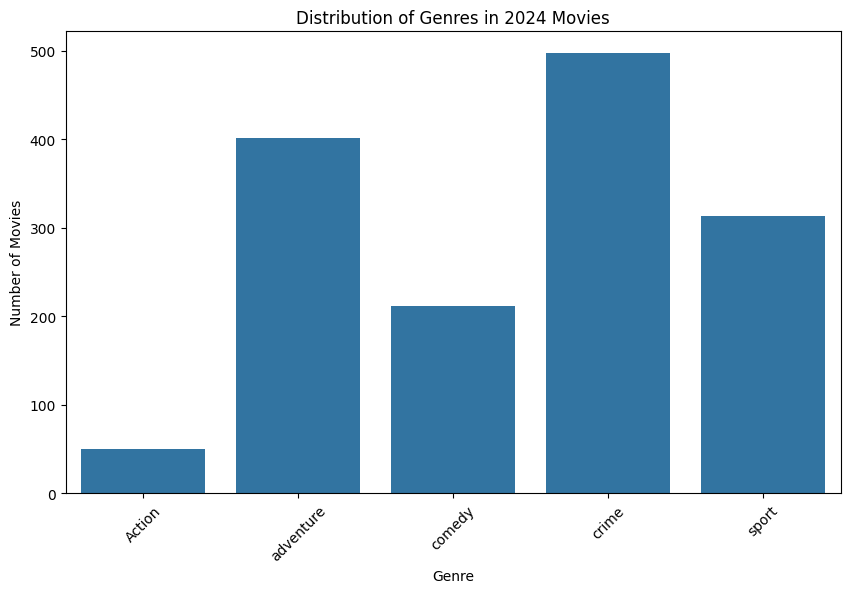

In [ ]:

case2 = sample.groupby('Genre')['Movie'].count().reset_index(name='Count')

# Plot
fig, ax2 = plt.subplots(figsize=(10,6))
sns.barplot(x='Genre', y='Count', data=case2, ax=ax2)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Distribution of Genres in 2024 Movies")
plt.show()

3. Duration Insights: Analyze the average duration of movies across genres.

In [ ]:
case3=sample.groupby(['Genre'])['Total_hours'].mean().reset_index(name='Avg_duration')
case3
fig, ax3 = plt.subplots(figsize=(10,6))

sns.barplot(x='Genre', y='Avg_duration', data=case3, ax=ax3)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Average Duration (hrs)")
plt.title("Average duration of Genres")
plt.show()

,Genre,Avg_duration
0,Action,1.997000
1,adventure,2.043849
2,comedy,1.820047
3,crime,1.981623
4,sport,1.905059


4. Voting Patterns: Discover genres with the highest average voting counts.

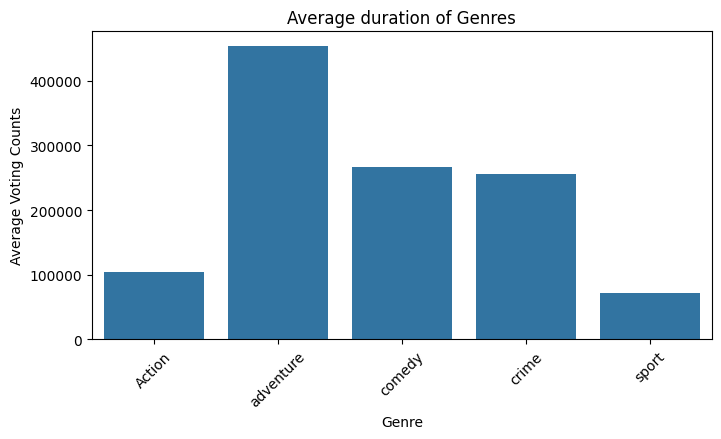

In [50]:
case4=sample.groupby(['Genre'])['Voting_counts'].mean().reset_index(name='Avg_Voting_counts')

fig, ax4= plt.subplots(figsize=(8,4))

sns.barplot(x='Genre', y='Avg_Voting_counts', data=case4, ax=ax4)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Average Voting Counts")
plt.title("Average duration of Genres")
plt.show()

5. Popular Genres: Identify the genres that dominate IMDb's 2024 list based on movie count.

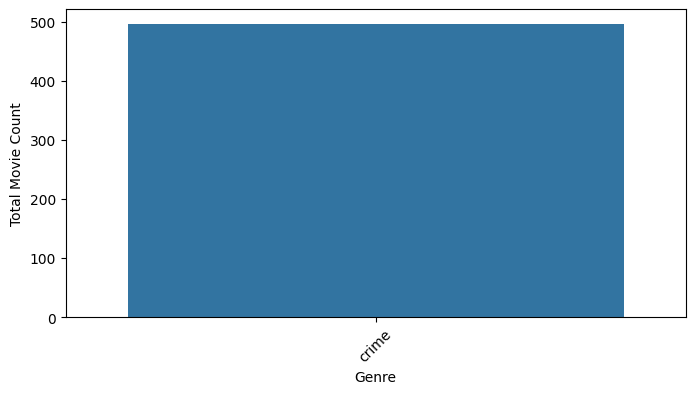

In [56]:
case5=sample.groupby(['Genre'])['Movie'].count().reset_index(name='Total Movie Count')
case5.sort_values(['Total Movie Count'],ascending=False,inplace=True)
case5=case5.head(1)

fig, ax5= plt.subplots(figsize=(8,4))
b=ax5
c=case5
sns.barplot(x='Genre', y='Total Movie Count', data=c, ax=b)
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Total Movie Count")
plt.show()

6.Rating Distribution: Analyze the distribution of ratings across all movies.

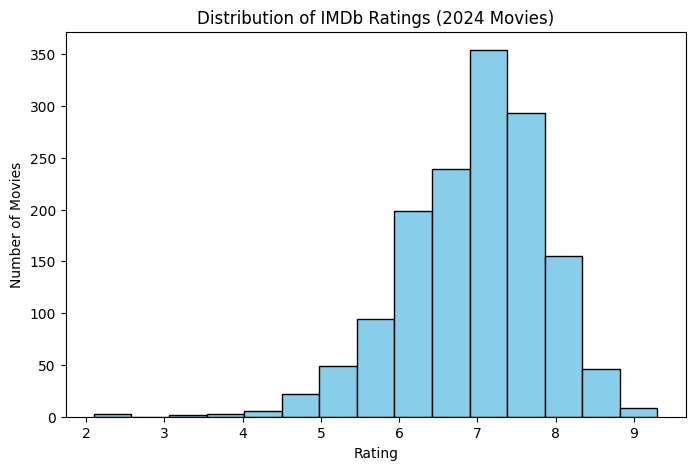

In [58]:
fig, ax6 = plt.subplots(figsize=(8,5))

plt.hist(sample['Rating'], bins=15, color="skyblue", edgecolor="black")

# Labels
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of IMDb Ratings (2024 Movies)")

plt.show()

7. Genre vs. Ratings: Compare the average ratings for each genre.

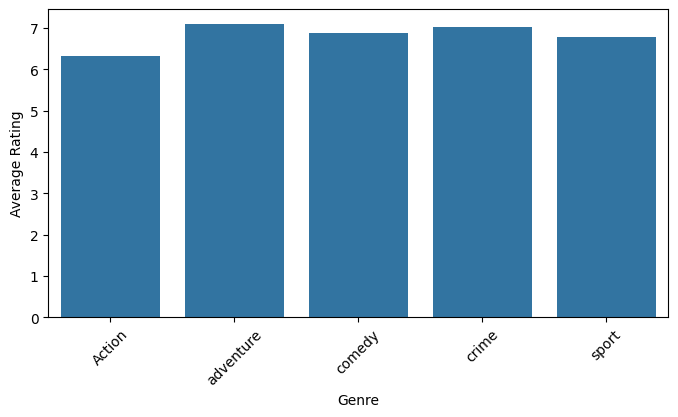

In [61]:
case7=sample.groupby(['Genre'])['Rating'].mean().reset_index(name='Avg_Rating')

fig, ax7= plt.subplots(figsize=(8,4))

sns.barplot(x='Genre', y='Avg_Rating', data=case7, ax=ax7)
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

8. Duration Extremes: Identify the shortest and longest movies in 2024.

In [ ]:
long=sample[sample.Total_hours==sample.Total_hours.max()]
short=sample[sample.Total_hours==sample.Total_hours.min()]
print(f"Longest Movie is : {long[['Movie','Total_hours']]}")
print(f"Short Movie is : {short[['Movie','Total_hours']]}")

Longest Movie is :                             Movie  Total_hours
186  Zack Snyder's Justice League     4.033333
Short Movie is :           Movie  Total_hours
1057  Following         1.15


In [76]:
long

,Rating,Genre,Movie,Voting_counts,Total_hours
186,7.9,adventure,Zack Snyder's Justice League,462000,4.033333


In [77]:
short

,Rating,Genre,Movie,Voting_counts,Total_hours
1057,7.4,crime,Following,107000,1.15


9. Top-Voted Movies: Find the top 10 movies with the highest voting counts.

Top 10 movies with the highes voting counts:


C:\Users\Test\AppData\Local\Temp\ipykernel_1540\183226577.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Voting_counts', y='Movie', data=a, palette='viridis')


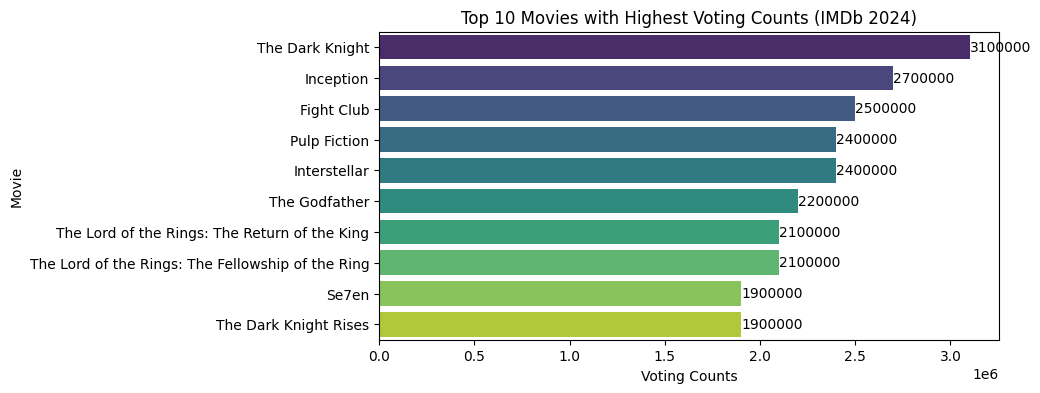

In [83]:
sample.sort_values(['Voting_counts'],ascending=False,inplace=True)
print("Top 10 movies with the highes voting counts:")
a=sample[['Movie','Voting_counts']].head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='Voting_counts', y='Movie', data=a, palette='viridis')

# Add data labels
for index, value in enumerate(a['Voting_counts']):
    plt.text(value + 500, index, str(value), va='center')

plt.title("Top 10 Movies with Highest Voting Counts (IMDb 2024)")
plt.xlabel("Voting Counts")
plt.ylabel("Movie")
plt.show()